In [7]:
#necessary package import
#Numpy
import numpy as np
from numpy.linalg import multi_dot
from math import factorial, tanh
#Matplotlib
import matplotlib.pyplot as plt
#Scipy
from scipy.linalg import block_diag
from scipy.special import comb as scipy_comb
#Thewalrus
from thewalrus import perm
#Strawberryfields
import strawberryfields as sf
from strawberryfields.ops import *
#import mplhep as hep
#Qutip
from qutip import *

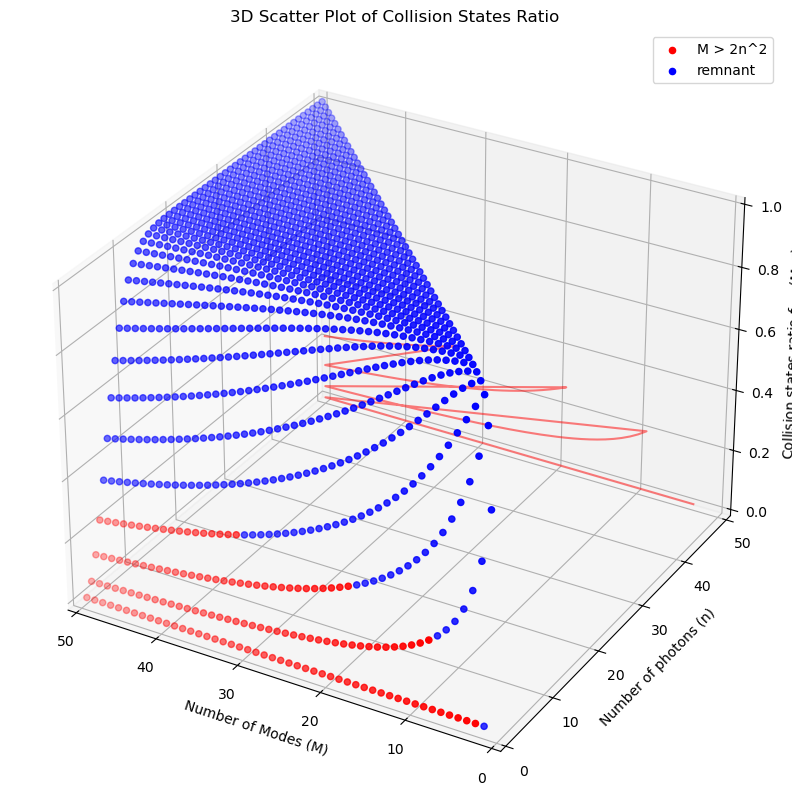

In [91]:
from mpl_toolkits.mplot3d import Axes3D

# Define the range for M and n again
M_values = np.arange(2, 51)  # M from 2 to 50
n_values = np.arange(1, 51)  # n from 1 to 40

# Prepare the meshgrid for M and n values again
M_grid, n_grid = np.meshgrid(M_values, n_values)

# Modified calculate_combination function to always return a value when M >= n
def calculate_combination(M, n):
    if M >= n:
        numerator = scipy_comb(M, n, exact=True)
        denominator = scipy_comb(M + n - 1, n, exact=True)
        result = 1 - numerator / denominator
        return result
    else:
        return np.nan  # Return np.nan instead of 0 for cases where M < n

M_n_squared_indices = M_grid > 2*n_grid**2
M_n_not_squared_indices = ~M_n_squared_indices

M_values_greater = M_grid[M_n_squared_indices]
n_values_greater = n_grid[M_n_squared_indices]
f_values_greater = [calculate_combination(M, n) for M, n in zip(M_values_greater, n_values_greater)]

M_values_not_greater = M_grid[M_n_not_squared_indices]
n_values_not_greater = n_grid[M_n_not_squared_indices]
f_values_not_greater = [calculate_combination(M, n) for M, n in zip(M_values_not_greater, n_values_not_greater)]

# 그래프 그리기
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# 각 scatter에 레이블 추가
scatter1 = ax.scatter(M_values_greater, n_values_greater, f_values_greater, c='red', marker='o', label='M > 2n^2')
scatter2 = ax.scatter(M_values_not_greater, n_values_not_greater, f_values_not_greater, c='blue', marker='o', label='remnant')

ax.plot(M_values_greater, f_values_greater, c = 'red', alpha=0.5, zdir = 'y', zs = 50)

ax.set_xlim(0,50)
ax.set_xlim(ax.get_xlim()[::-1])
ax.set_ylim(0,50)
ax.set_zlim(0,1)

ax.set_xlabel('Number of Modes (M)')
ax.set_ylabel('Number of photons (n)')
ax.set_zlabel(r'Collision states ratio $\mathit{f_{ratio}(M,n)}$')
ax.set_title('3D Scatter Plot of Collision States Ratio')

#범례
ax.legend()

#이미지를 경로에 저장. 확장자는 .pdf, .png, .jpeg등 가능
#plt.savefig('/Users/jaewonlee/Lab Code/PQC/Boson Sampling/Fig/Collision states ratio.png', transparent = True)

plt.show()

In [88]:
print(calculate_combination(50,10))

0.8365025161547556
